In [67]:
# fundamentals
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn.metrics import confusion_matrix

#  printing of number without scientific notation
np.set_printoptions(precision=3,suppress=True)

In [68]:
df_sc = pd.read_csv('../data/processed_sensor_community.csv').drop('Unnamed: 0', axis=1)
df_sc['timestamp'] = pd.to_datetime(df_sc.timestamp)
df_sc['date'] = pd.to_datetime(df_sc.date)

In [262]:
display(df_sc.head(10))

,hour,date,lat,lon,timestamp,PM10,PM2p5,PM10_std,PM2p5_std,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std,city
0,0,2020-01-01,50.042000,8.436000,2020-01-01,212.110833,140.574167,24.278724,16.827501,NaN,2.700000,96.000000,NaN,NaN,NaN,Frankfurt
68,0,2020-01-01,53.068000,8.870000,2020-01-01,1999.900000,999.900000,0.000000,0.000000,103336.916667,1.718750,99.940417,9.744192,0.114296,0.206345,Bremen
67,0,2020-01-01,53.064000,8.798000,2020-01-01,786.260400,488.984400,295.924349,195.033055,NaN,0.248000,99.900000,NaN,0.214321,0.000000,Bremen
66,0,2020-01-01,53.062000,8.806000,2020-01-01,281.866667,148.982083,145.758391,104.458442,NaN,NaN,NaN,NaN,NaN,NaN,Bremen
65,0,2020-01-01,53.058534,8.763459,2020-01-01,766.882000,458.774000,209.349664,137.049124,NaN,0.028000,92.824000,NaN,0.124231,0.077889,Bremen
64,0,2020-01-01,53.056000,8.690000,2020-01-01,211.266875,126.031250,71.700425,40.492563,NaN,-0.562500,99.900000,NaN,0.154380,0.000000,Bremen
63,0,2020-01-01,53.044000,8.910000,2020-01-01,395.302400,206.682800,140.136895,91.540795,NaN,1.128000,91.592000,NaN,0.156844,0.208006,Bremen
62,0,2020-01-01,53.040000,8.850000,2020-01-01,1310.372500,715.086250,224.782729,92.297884,NaN,1.482609,99.900000,NaN,0.262249,0.000000,Bremen
61,0,2020-01-01,53.028000,8.834000,2020-01-01,580.239231,307.526923,288.635621,182.644360,NaN,-0.554167,99.900000,NaN,0.147381,0.000000,Bremen
60,0,2020-01-01,53.014000,8.886000,2020-01-01,262.209200,127.392400,154.674962,79.288421,NaN,1.144000,92.592000,NaN,0.175784,0.662017,Bremen


In [261]:
df_sc.shape

(1872419, 16)

In [70]:
df_sc.sort_values('timestamp', inplace=True)

In [152]:
display(df_sc.info())
display(df_sc.loc[:,['pressure', 'temperature', 'humidity', 'PM10', 'PM2p5']].describe().T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872419 entries, 0 to 1872418
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   hour             int64         
 1   date             datetime64[ns]
 2   lat              float64       
 3   lon              float64       
 4   timestamp        datetime64[ns]
 5   PM10             float64       
 6   PM2p5            float64       
 7   PM10_std         float64       
 8   PM2p5_std        float64       
 9   pressure         float64       
 10  temperature      float64       
 11  humidity         float64       
 12  pressure_std     float64       
 13  temperature_std  float64       
 14  humidity_std     float64       
 15  city             object        
dtypes: datetime64[ns](2), float64(12), int64(1), object(1)
memory usage: 307.4+ MB


None

,count,mean,std,min,25%,50%,75%,max
pressure,366039.0,99734.563922,17078.993859,951.015385,99874.167813,100638.389655,101455.600000,6.437391e+06
temperature,1571687.0,12.238369,53.894040,-3276.600000,6.820833,12.229167,19.095000,1.959636e+02
humidity,1559298.0,79.774832,26.862098,0.000000,63.233333,95.505882,99.900000,2.094545e+03
PM10,1872408.0,28.059194,162.742950,0.000000,4.190952,8.142500,16.140421,1.999900e+03
PM2p5,1872405.0,14.979465,84.485208,0.000000,1.924167,4.074583,9.200833,9.999000e+02


In [ ]:
df_sc.groupby

In [182]:
pressure_count = df_sc[df_sc['pressure'] > 0].pressure.count()
total = df_sc.shape[0]
pressure_NaN = total - pressure_count

temperature_count = df_sc[df_sc['temperature'] > 0].temperature.count()
total = df_sc.shape[0]
temperature_NaN = total - temperature_count

humidity_count = df_sc[df_sc['humidity'] > 0].humidity.count()
total = df_sc.shape[0]
humidity_NaN = total - humidity_count

print('                              missing values')
print('pressure         ', pressure_NaN , '    ', round(pressure_NaN / total * 100,2), '%')
print('temperature     ', temperature_NaN , '    ', round(temperature_NaN / total * 100,2), '%')
print('humidity            ', humidity_NaN , '    ', round(humidity_NaN / total * 100,2), '%')

                              missing values
pressure          1506380      80.45 %
temperature      332954      17.78 %
humidity             313424      16.74 %


In [125]:
df_sc.query("lat==53.094000 and lon==8.800000")

,hour,date,lat,lon,timestamp,PM10,PM2p5,PM10_std,PM2p5_std,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std,city
88,0,2020-01-01,53.094,8.8,2020-01-01 00:00:00,603.574400,416.924800,101.592197,81.169325,103360.840000,2.358800,100.0,9.040096,0.143884,0.0,Bremen
76583,1,2020-01-01,53.094,8.8,2020-01-01 01:00:00,371.845833,223.328750,115.649053,86.018717,103328.291667,2.079167,100.0,7.607086,0.086322,0.0,Bremen
152584,2,2020-01-01,53.094,8.8,2020-01-01 02:00:00,286.286400,144.027200,47.196824,15.194897,103301.080000,1.704000,100.0,13.981893,0.196511,0.0,Bremen
228004,3,2020-01-01,53.094,8.8,2020-01-01 03:00:00,398.416667,120.210833,144.803565,21.431496,103304.625000,0.917083,100.0,6.452586,0.387528,0.0,Bremen
303888,4,2020-01-01,53.094,8.8,2020-01-01 04:00:00,210.317500,84.188750,47.001256,9.150113,103285.375000,-0.470417,100.0,5.829554,0.313070,0.0,Bremen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559674,19,2022-02-28,53.094,8.8,2022-02-28 19:00:00,33.631667,18.187083,3.796269,1.193346,103144.445000,4.675000,100.0,4.472472,0.349111,0.0,Bremen
1638552,20,2022-02-28,53.094,8.8,2022-02-28 20:00:00,37.732500,18.972500,25.247513,9.782266,103141.417083,3.611250,100.0,5.955964,0.289997,0.0,Bremen
1717260,21,2022-02-28,53.094,8.8,2022-02-28 21:00:00,35.311250,18.632500,8.636903,4.232735,103114.962500,2.888333,100.0,11.922473,0.158763,0.0,Bremen
1795133,22,2022-02-28,53.094,8.8,2022-02-28 22:00:00,32.098333,17.451667,3.655138,1.470530,103072.369167,2.619167,100.0,14.756146,0.045960,0.0,Bremen


(18262.0, 18293.0)

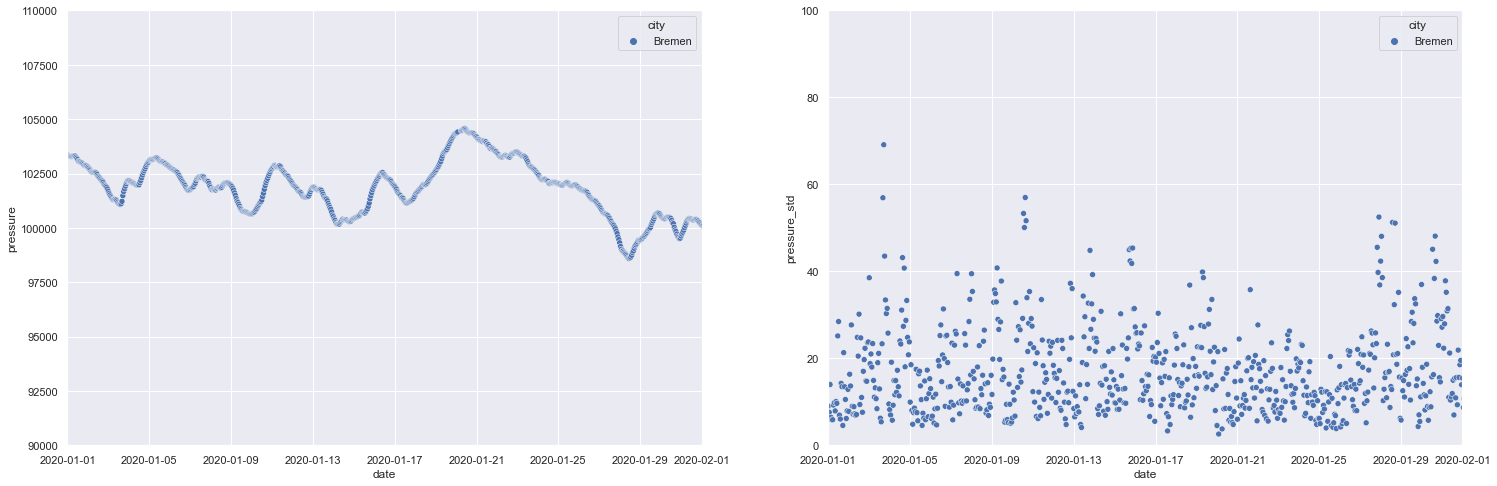

In [241]:
# plot pressure for one sensors
plt.figure(figsize=(25, 8))
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2020-02-01')

plt.subplot(1,2,1)
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='pressure', hue='city')
plt.xlabel('date')
plt.ylim(90000,110000)
plt.xlim(start, end)

plt.subplot(1,2,2)
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='pressure_std', hue='city')
plt.xlabel('date')
plt.ylim(0,100)
plt.xlim(start, end)

(18414.0, 18444.0)

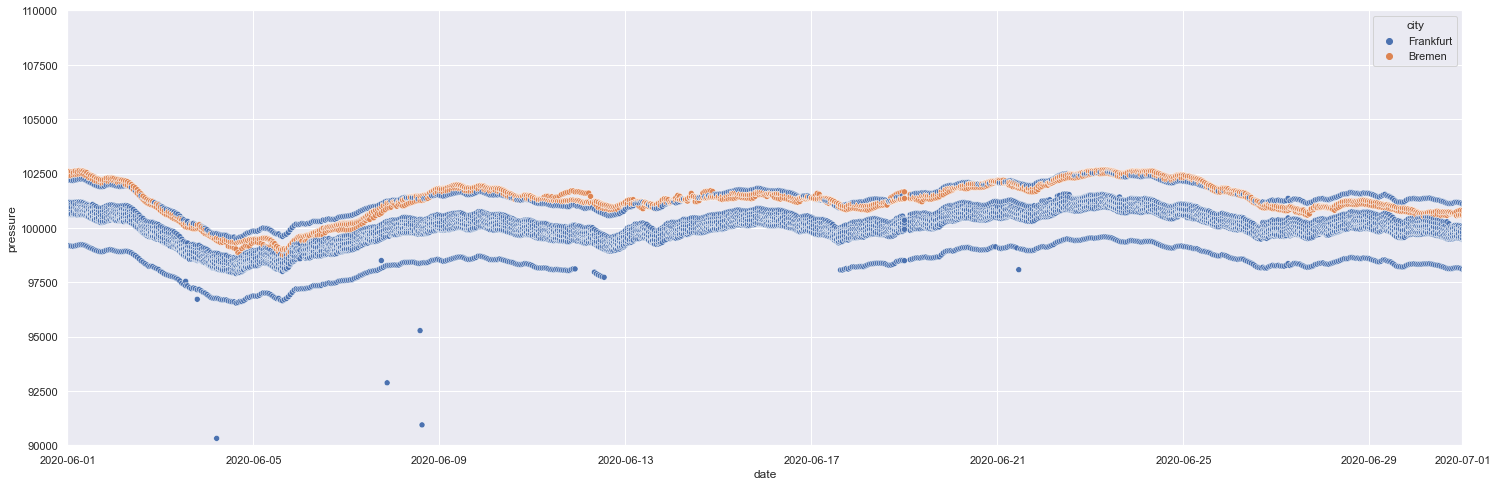

In [258]:
# plot pressure o all sensors
start = pd.to_datetime('2020-06-01')
end = pd.to_datetime('2020-07-01')
plt.figure(figsize=(25, 8))

sns.scatterplot(data=df_sc, x='timestamp', y='pressure', hue='city')
plt.xlabel('date')
plt.ylim(90000,110000)
plt.xlim(start, end)

(18275.0, 18281.0)

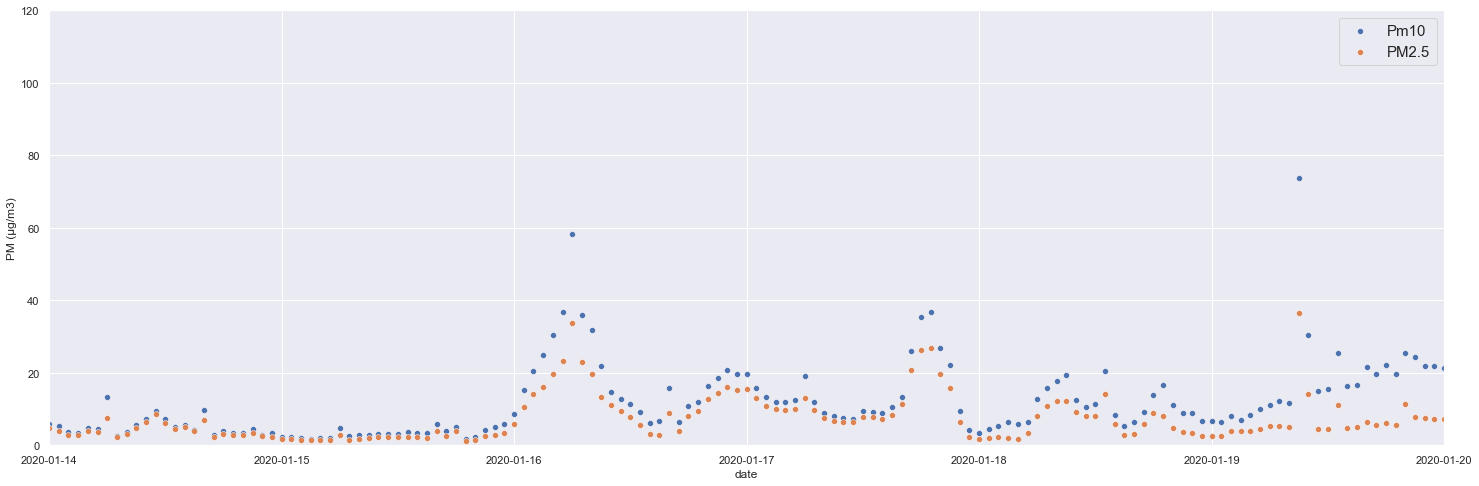

In [259]:
# plot PM for one sensor
plt.figure(figsize=(25, 8))
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='PM10')
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='PM2p5')
plt.legend(['Pm10', 'PM2.5'], fontsize=15)
plt.ylabel('PM (µg/m3)')
plt.xlabel('date')
plt.ylim(0,120)
plt.xlim(pd.to_datetime('2020-01-14'), pd.to_datetime('2020-01-20'))
#plt.xlim(18250,19080)


(18262.0, 18292.0)

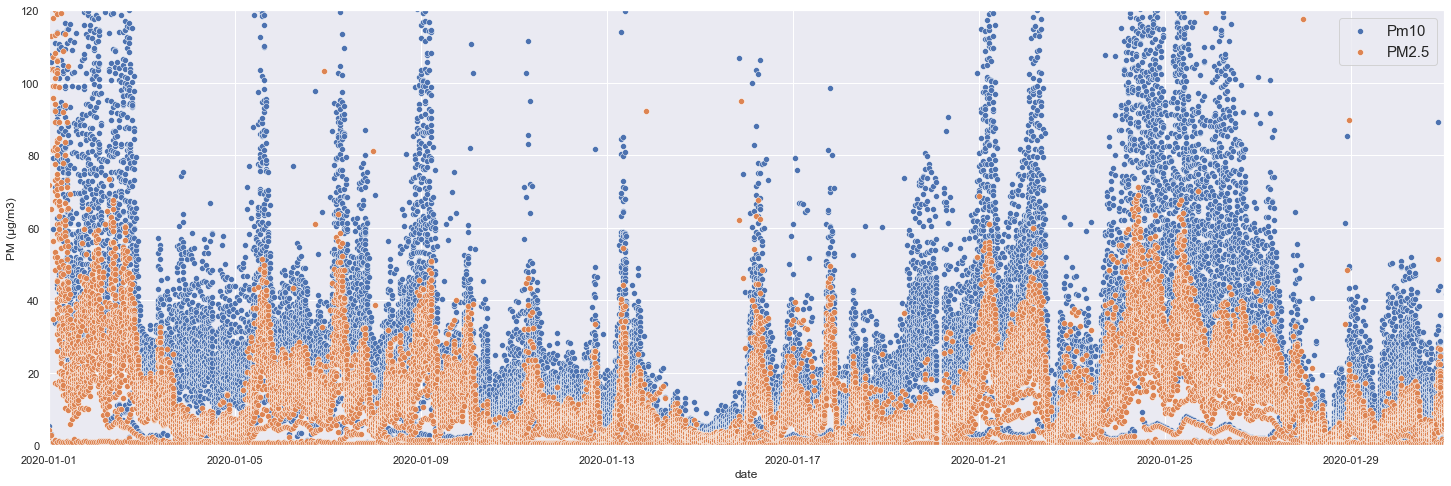

In [247]:
# plot PM for all sensors in Bremen
plt.figure(figsize=(25, 8))
sns.scatterplot(data=df_sc.query("city=='Bremen'"), x='timestamp', y='PM10')
sns.scatterplot(data=df_sc.query("city=='Bremen'"), x='timestamp', y='PM2p5')
plt.legend(['Pm10', 'PM2.5'], fontsize=15)
plt.ylabel('PM (µg/m3)')
plt.xlabel('date')
plt.ylim(0,120)
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-01-31'))
#plt.xlim(18250,19080)

<AxesSubplot:xlabel='PM2p5', ylabel='PM10'>

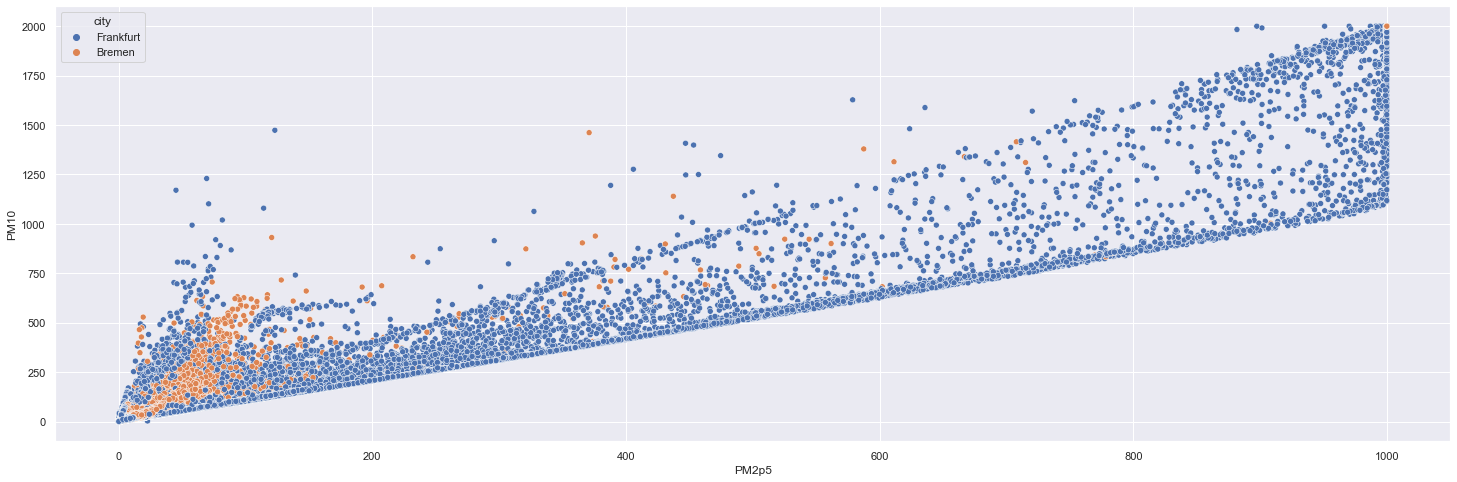

In [260]:

color = ['red', 'blue']
plt.figure(figsize=(25, 8))
sns.scatterplot(data=df_sc, x='PM2p5', y='PM10', hue='city', c=color)
#plt.legend(['Pm10', 'PM2.5'], fontsize=15)
#plt.ylabel('PM (µg/m3)')
#plt.xlabel('date')
#plt.ylim(0,120)
#plt.xlim(pd.to_datetime('2021-01-01'), pd.to_datetime('2021-01-31'))
#plt.xlim(18250,19080)

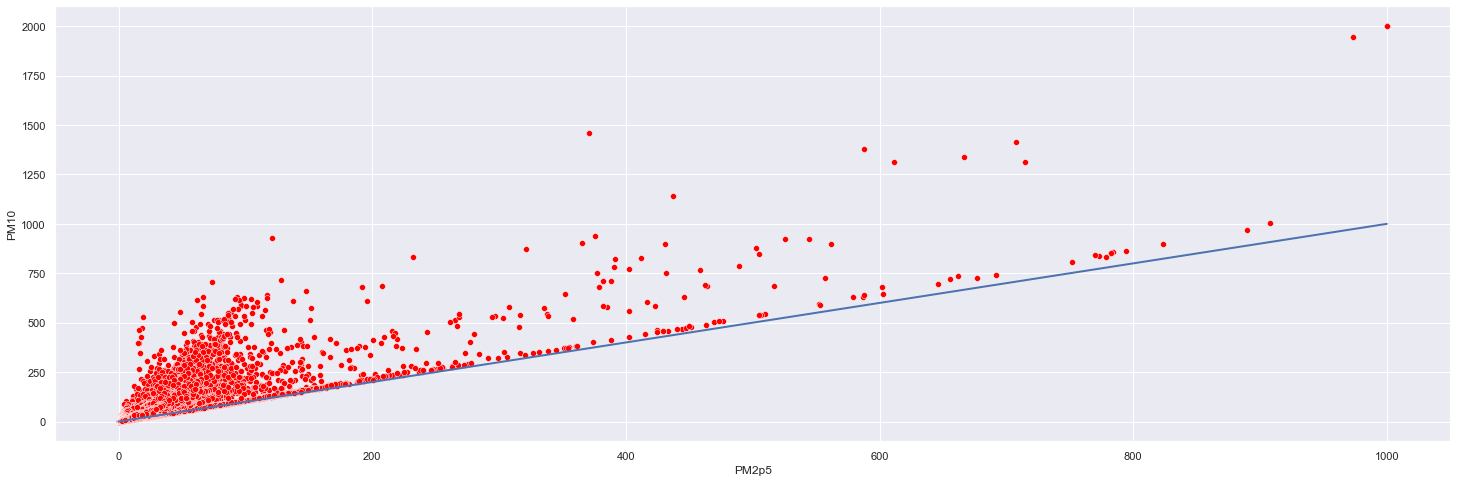

In [255]:
color = ['red']
plt.figure(figsize=(25, 8))
sns.scatterplot(data=df_sc.query("city=='Bremen'"), x='PM2p5', y='PM10', c=color)
plt.plot([0, 1000], [0, 1000], linewidth=2)

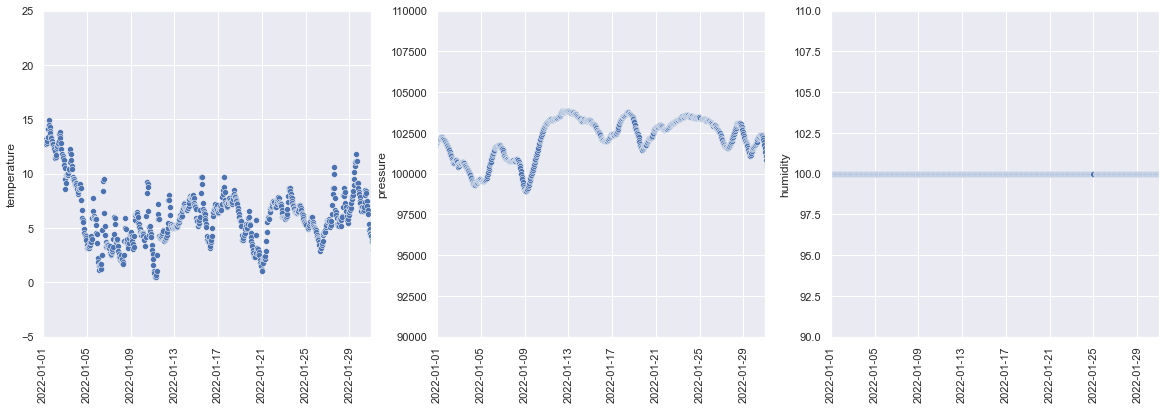

In [147]:
start = pd.to_datetime('2022-01-01')
end = pd.to_datetime('2022-01-31')

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='temperature')
plt.xlim(start, end)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylim(-5,25)

plt.subplot(1,3,2)
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='pressure')
plt.xlim(start, end)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylim(90000,110000)

plt.subplot(1,3,3)
sns.scatterplot(data=df_sc.query("lat==53.094000 and lon==8.800000"), x='timestamp', y='humidity')
plt.xlim(start, end)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylim(90,110)

plt.show()

#plt.legend(['temperature', 'humidity'], fontsize=15)
#plt.ylabel('PM (µg/m3)')
#plt.xlabel('date')
#plt.ylim(0,120)

#plt.xlim(18250,19080)

<AxesSubplot:>

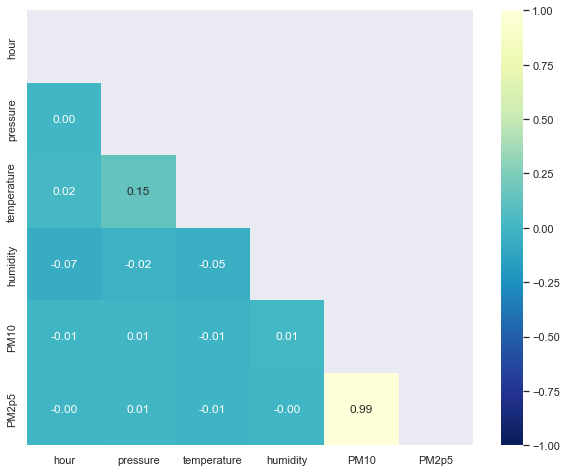

In [81]:
# correlation map
columns_plot = ['hour', 'pressure', 'temperature', 'humidity', 'PM10', 'PM2p5', 'city']
corr_mtrx_sc = df_sc[columns_plot].corr()
plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_mtrx_sc, dtype=bool))
sns.heatmap(corr_mtrx_sc, annot=True, cmap="YlGnBu_r", mask=mask, vmax=1, vmin=-1,fmt='.2f')

In [79]:
df_sc.head()

,hour,date,lat,lon,timestamp,PM10,PM2p5,PM10_std,PM2p5_std,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std,city
0,0,2020-01-01,50.042000,8.436000,2020-01-01,212.110833,140.574167,24.278724,16.827501,NaN,2.70000,96.000000,NaN,NaN,NaN,Frankfurt
68,0,2020-01-01,53.068000,8.870000,2020-01-01,1999.900000,999.900000,0.000000,0.000000,103336.916667,1.71875,99.940417,9.744192,0.114296,0.206345,Bremen
67,0,2020-01-01,53.064000,8.798000,2020-01-01,786.260400,488.984400,295.924349,195.033055,NaN,0.24800,99.900000,NaN,0.214321,0.000000,Bremen
66,0,2020-01-01,53.062000,8.806000,2020-01-01,281.866667,148.982083,145.758391,104.458442,NaN,NaN,NaN,NaN,NaN,NaN,Bremen
65,0,2020-01-01,53.058534,8.763459,2020-01-01,766.882000,458.774000,209.349664,137.049124,NaN,0.02800,92.824000,NaN,0.124231,0.077889,Bremen


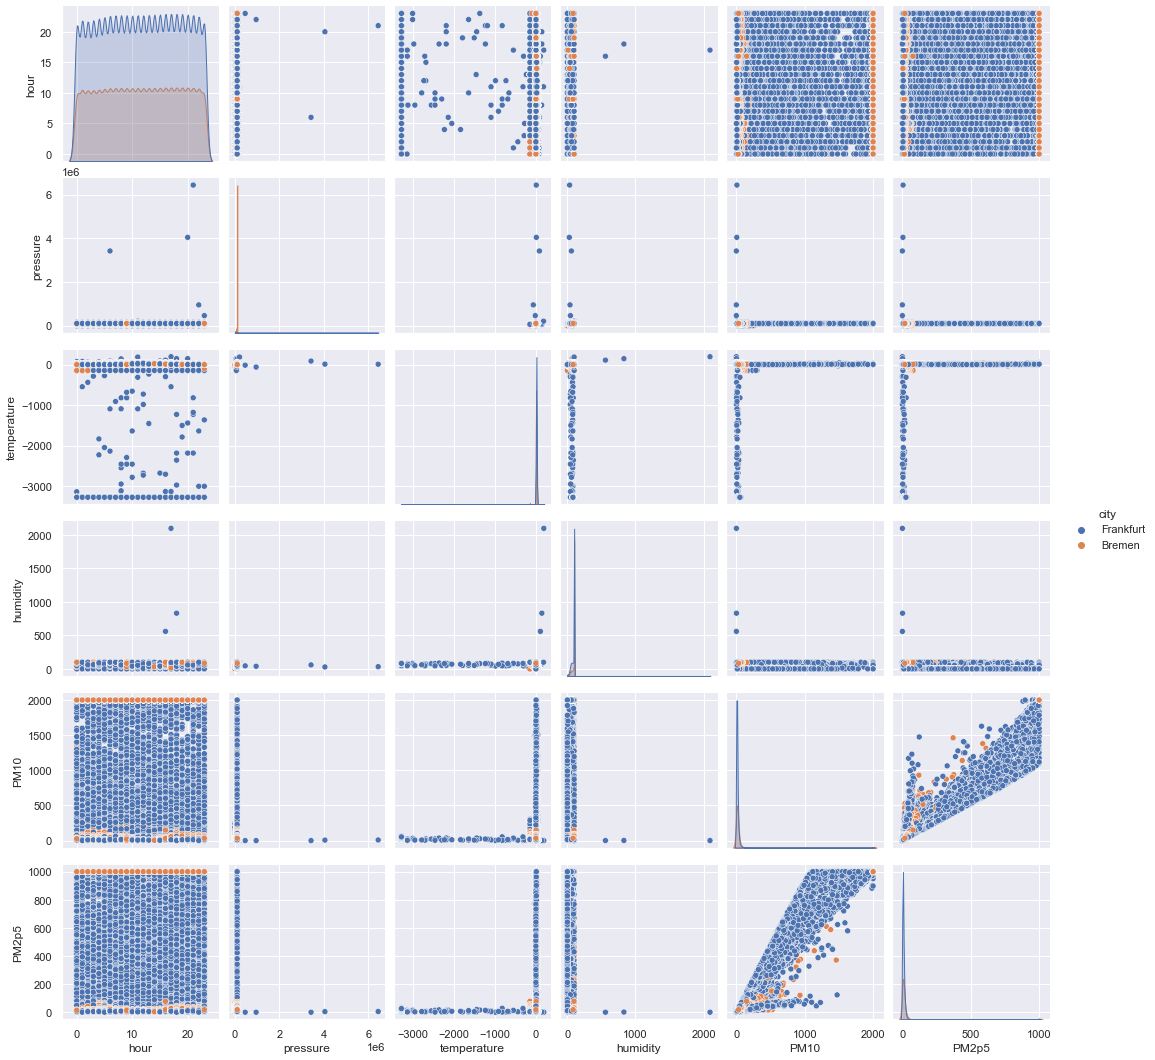

In [242]:
#pairplotting the features based on city
sns.pairplot(data=df_sc[columns_plot], hue='city');